In [54]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msn

<span style="font-family:Cambria; color:#0261ab; font-size: 30px; text-shadow: 0.5px 0.5px black; font-weight: bold"> 1 Data Wrangling </span>

<span style="font-family:Cambria; color:#0261ab; font-size: 24px; text-shadow: 0.5px 0.5px black"> 1.1 Inquire structural integrity </span>

In [55]:
path = '../dataset/raw/netflix_userbase.csv'
df_netflix = pd.read_csv(path, index_col=False)


In [56]:
df_netflix.reset_index(drop=True, inplace=True)
df_netflix.head(25)


,User ID,Subscription Type,Monthly Revenue,Join Date,Last Payment Date,Country,Age,Gender,Device,Plan Duration
0,1,Basic,10,15-01-22,10-06-23,United States,28,Male,Smartphone,1 Month
1,2,Premium,15,05-09-21,22-06-23,Canada,35,Female,Tablet,1 Month
2,3,Standard,12,28-02-23,27-06-23,United Kingdom,42,Male,Smart TV,1 Month
3,4,Standard,12,10-07-22,26-06-23,Australia,51,Female,Laptop,1 Month
4,5,Basic,10,01-05-23,28-06-23,Germany,33,Male,Smartphone,1 Month
5,6,Premium,15,18-03-22,27-06-23,France,29,Female,Smart TV,1 Month
6,7,Standard,12,09-12-21,25-06-23,Brazil,46,Male,Tablet,1 Month
7,8,Basic,10,02-04-23,24-06-23,Mexico,39,Female,Laptop,1 Month
8,9,Standard,12,20-10-22,23-06-23,Spain,37,Male,Smartphone,1 Month
9,10,Premium,15,07-01-23,22-06-23,Italy,44,Female,Smart TV,1 Month


In [57]:
df_netflix.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   User ID            2500 non-null   int64 
 1   Subscription Type  2500 non-null   object
 2   Monthly Revenue    2500 non-null   int64 
 3   Join Date          2500 non-null   object
 4   Last Payment Date  2500 non-null   object
 5   Country            2500 non-null   object
 6   Age                2500 non-null   int64 
 7   Gender             2500 non-null   object
 8   Device             2500 non-null   object
 9   Plan Duration      2500 non-null   object
dtypes: int64(3), object(7)
memory usage: 195.4+ KB


In [58]:
df_netflix.describe()


,User ID,Monthly Revenue,Age
count,2500.00000,2500.000000,2500.000000
mean,1250.50000,12.508400,38.795600
std,721.83216,1.686851,7.171778
min,1.00000,10.000000,26.000000
25%,625.75000,11.000000,32.000000
50%,1250.50000,12.000000,39.000000
75%,1875.25000,14.000000,45.000000
max,2500.00000,15.000000,51.000000


<span style="font-family:Cambria; color:#0261ab; font-size: 24px; text-shadow: 0.5px 0.5px black"> 1.2 Enhance data accessibility </span>

In [59]:
print("Pre-processing Columns:")
df_netflix.columns


Pre-processing Columns:


Index(['User ID', 'Subscription Type', 'Monthly Revenue', 'Join Date',
       'Last Payment Date', 'Country', 'Age', 'Gender', 'Device',
       'Plan Duration'],
      dtype='object')

In [60]:
df_netflix.rename(columns={'User ID': 'user_id', 'Subscription Type': 'subscription_type', 'Monthly Revenue': 
                           'monthly_revenue', 'Join Date': 'join_date', 'Last Payment Date': 'last_payment_date',
                           'Country': 'country', 'Age': 'age', 'Gender': 'gender', 'Device': 'device', 
                           'Plan Duration': 'plan_duration'}, inplace=True)


In [61]:
print("Post-processing Columns:")
df_netflix.columns


Post-processing Columns:


Index(['user_id', 'subscription_type', 'monthly_revenue', 'join_date',
       'last_payment_date', 'country', 'age', 'gender', 'device',
       'plan_duration'],
      dtype='object')

<span style="font-family:Cambria; color:#0261ab; font-size: 24px; text-shadow: 0.5px 0.5px black"> 1.3 Analyze any Missing values  </span>

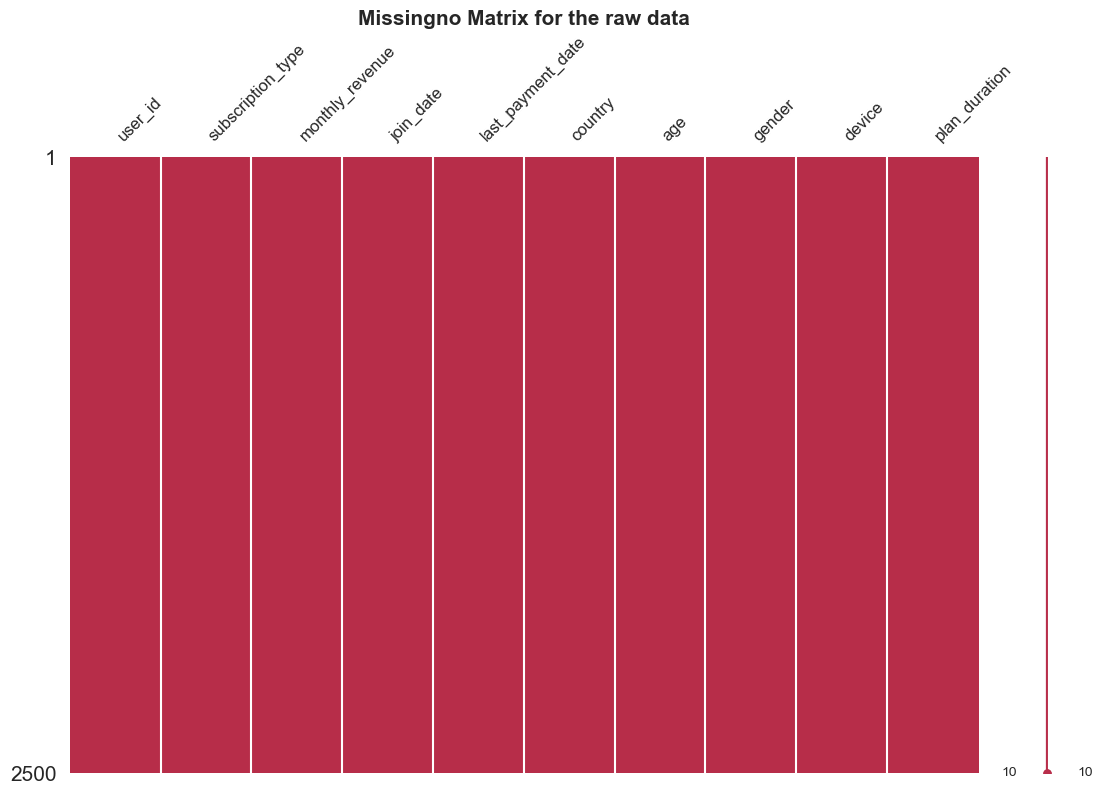

In [62]:
msn.matrix(df_netflix, color=(0.72, 0.18, 0.29), figsize=[13, 8], fontsize=12)
plt.title("Missingno Matrix for the raw data", fontsize=15, fontweight='bold')
plt.show()


In [63]:
df_netflix.isnull().sum()


user_id              0
subscription_type    0
monthly_revenue      0
join_date            0
last_payment_date    0
country              0
age                  0
gender               0
device               0
plan_duration        0
dtype: int64

<span style="font-family:Cambria; color:#0261ab; font-size: 24px; text-shadow: 0.5px 0.5px black"> 1.4 Data cleaning </span>

In [64]:
df_netflix.shape


(2500, 10)

In [65]:
df_netflix.dropna(axis='columns')


,user_id,subscription_type,monthly_revenue,join_date,last_payment_date,country,age,gender,device,plan_duration
0,1,Basic,10,15-01-22,10-06-23,United States,28,Male,Smartphone,1 Month
1,2,Premium,15,05-09-21,22-06-23,Canada,35,Female,Tablet,1 Month
2,3,Standard,12,28-02-23,27-06-23,United Kingdom,42,Male,Smart TV,1 Month
3,4,Standard,12,10-07-22,26-06-23,Australia,51,Female,Laptop,1 Month
4,5,Basic,10,01-05-23,28-06-23,Germany,33,Male,Smartphone,1 Month
...,...,...,...,...,...,...,...,...,...,...
2495,2496,Premium,14,25-07-22,12-07-23,Spain,28,Female,Smart TV,1 Month
2496,2497,Basic,15,04-08-22,14-07-23,Spain,33,Female,Smart TV,1 Month
2497,2498,Standard,12,09-08-22,15-07-23,United States,38,Male,Laptop,1 Month
2498,2499,Standard,13,12-08-22,12-07-23,Canada,48,Female,Tablet,1 Month


<span style="font-family:Cambria; color:#0261ab; font-size: 24px; text-shadow: 0.5px 0.5px black"> 1.5 Find duplicate Cell </span>

In [66]:
duplicated_cells = 0
check_duplicate = df_netflix.duplicated()


In [67]:
for row in check_duplicate:
    if row:
        duplicated_cells += 1

duplicated_prc = (duplicated_cells / len(check_duplicate)) * 100
print("• Total Cells:", len(check_duplicate), '\n'
     "• Duplicated Cells:", duplicated_cells,'\n'
     "• Duplicate %:", duplicated_prc)

• Total Cells: 2500 
• Duplicated Cells: 0 
• Duplicate %: 0.0


<span style="font-family:Cambria; color:#0261ab; font-size: 24px; text-shadow: 0.5px 0.5px black"> 1.6 Check for Outliers </span>

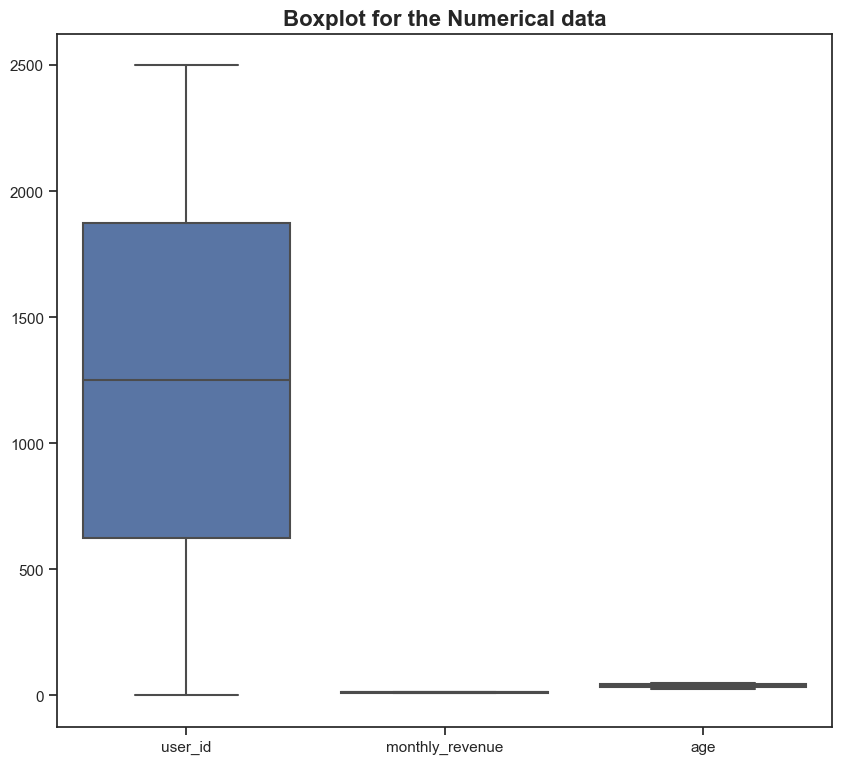

In [68]:
plt.figure(figsize=(10, 9))
sns.boxplot(df_netflix)
plt.title("Boxplot for the Numerical data", fontsize=16, fontweight='bold')
plt.show()


<span style="font-family:Cambria; color:#0261ab; font-size: 24px; text-shadow: 0.5px 0.5px black"> 1.7 Ensure data consistency</span>

In [69]:
df_netflix['join_date'] = pd.to_datetime(df_netflix['join_date'])
df_netflix['last_payment_date'] = pd.to_datetime(df_netflix['last_payment_date'])
df_netflix.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   user_id            2500 non-null   int64         
 1   subscription_type  2500 non-null   object        
 2   monthly_revenue    2500 non-null   int64         
 3   join_date          2500 non-null   datetime64[ns]
 4   last_payment_date  2500 non-null   datetime64[ns]
 5   country            2500 non-null   object        
 6   age                2500 non-null   int64         
 7   gender             2500 non-null   object        
 8   device             2500 non-null   object        
 9   plan_duration      2500 non-null   object        
dtypes: datetime64[ns](2), int64(3), object(5)
memory usage: 195.4+ KB


<span style="font-family:Cambria; color:#0261ab; font-size: 24px; text-shadow: 0.5px 0.5px black"> 1.8 Combine Features</span>

In [70]:
df_netflix['subscribed_duration'] = df_netflix['last_payment_date'] - df_netflix['join_date']
df_netflix['subscribed_duration'] = df_netflix['subscribed_duration'].dt.days
df_netflix['subscribed_duration'].head(25)


0     629
1     774
2     119
3     262
4     174
5     466
6     651
7     140
8     246
9      -9
10    402
11     97
12    574
13    534
14    -69
15    358
16    517
17    614
18    128
19     26
20   -106
21    341
22    776
23    479
24    106
Name: subscribed_duration, dtype: int64

In [71]:
df_netflix['start_month'] = df_netflix['join_date'].dt.month
df_netflix['start_month'].head(25)


0      1
1      5
2      2
3     10
4      1
5      3
6      9
7      2
8     10
9      7
10     5
11     3
12    11
13     1
14     9
15     7
16     1
17    10
18     2
19     5
20    10
21     7
22     5
23     3
24     3
Name: start_month, dtype: int64

In [72]:
# Customer Lifetime Value (clv)
df_netflix['clv'] = df_netflix['subscribed_duration'] * df_netflix['monthly_revenue']
df_netflix['clv'].head(25)                            


0      6290
1     11610
2      1428
3      3144
4      1740
5      6990
6      7812
7      1400
8      2952
9      -135
10     4020
11     1455
12     6888
13     5340
14     -828
15     5370
16     5170
17     7368
18     1920
19      260
20    -1590
21     3410
22     9312
23     5748
24     1060
Name: clv, dtype: int64

<span style="font-family:Cambria; color:#0261ab; font-size: 24px; text-shadow: 0.5px 0.5px black"> 1.9 Truncate redundant features </span>

In [73]:
df_netflix = df_netflix.drop(['last_payment_date', 'join_date'], axis=1)
df_netflix.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   user_id              2500 non-null   int64 
 1   subscription_type    2500 non-null   object
 2   monthly_revenue      2500 non-null   int64 
 3   country              2500 non-null   object
 4   age                  2500 non-null   int64 
 5   gender               2500 non-null   object
 6   device               2500 non-null   object
 7   plan_duration        2500 non-null   object
 8   subscribed_duration  2500 non-null   int64 
 9   start_month          2500 non-null   int64 
 10  clv                  2500 non-null   int64 
dtypes: int64(6), object(5)
memory usage: 215.0+ KB


<span style="font-family:Cambria; color:#0261ab; font-size: 24px; text-shadow: 0.5px 0.5px black"> 1.10 Save processed data  for future Model Integration</span>

In [74]:
try:
    df_netflix.to_csv('../dataset/processed/netflix_processed.csv', sep=',', index=False)
    df_netflix.to_json('../dataset/processed/netflix_processed.json')

except Exception as exc:
    print("! Exception encountered", exc)

else:
    print("Dataframe successfully saved")    
    

Dataframe successfully saved


<span style="font-family:Cambria; color:#0261ab; font-size: 30px; text-shadow: 0.5px 0.5px black; font-weight: bold"> 2 Feature Analysis  </span>

<span style="font-family:Cambria; color:#0261ab; font-size: 24px; text-shadow: 0.5px 0.5px black"> 2.1 Univariate Inspection </span>

<span style="font-family:Cambria; color:#0261ab; font-size: 20px; text-shadow: 0.5px 0.5px black"> Monthly Revenues </span>

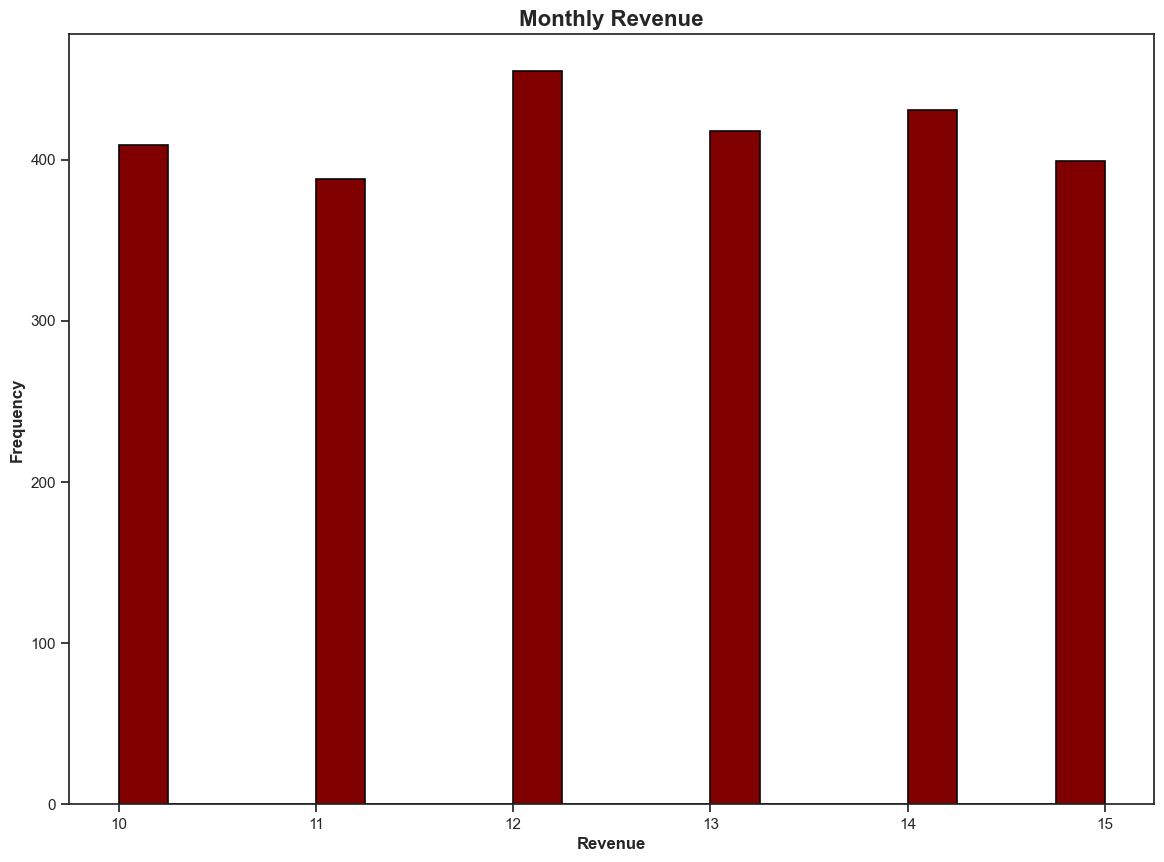

In [75]:
plt.figure(figsize=(14, 10))
plt.hist(df_netflix['monthly_revenue'], bins=20, color='maroon', edgecolor='#0d0103', linewidth=1.2)
plt.title("Monthly Revenue", fontsize=16, fontweight='bold')
plt.xlabel("Revenue", fontsize=12, fontweight='bold')
plt.ylabel("Frequency", fontsize=12, fontweight='bold')
plt.show()



<span style="font-family:Cambria; color:#0261ab; font-size: 20px; text-shadow: 0.5px 0.5px black"> Genders </span>

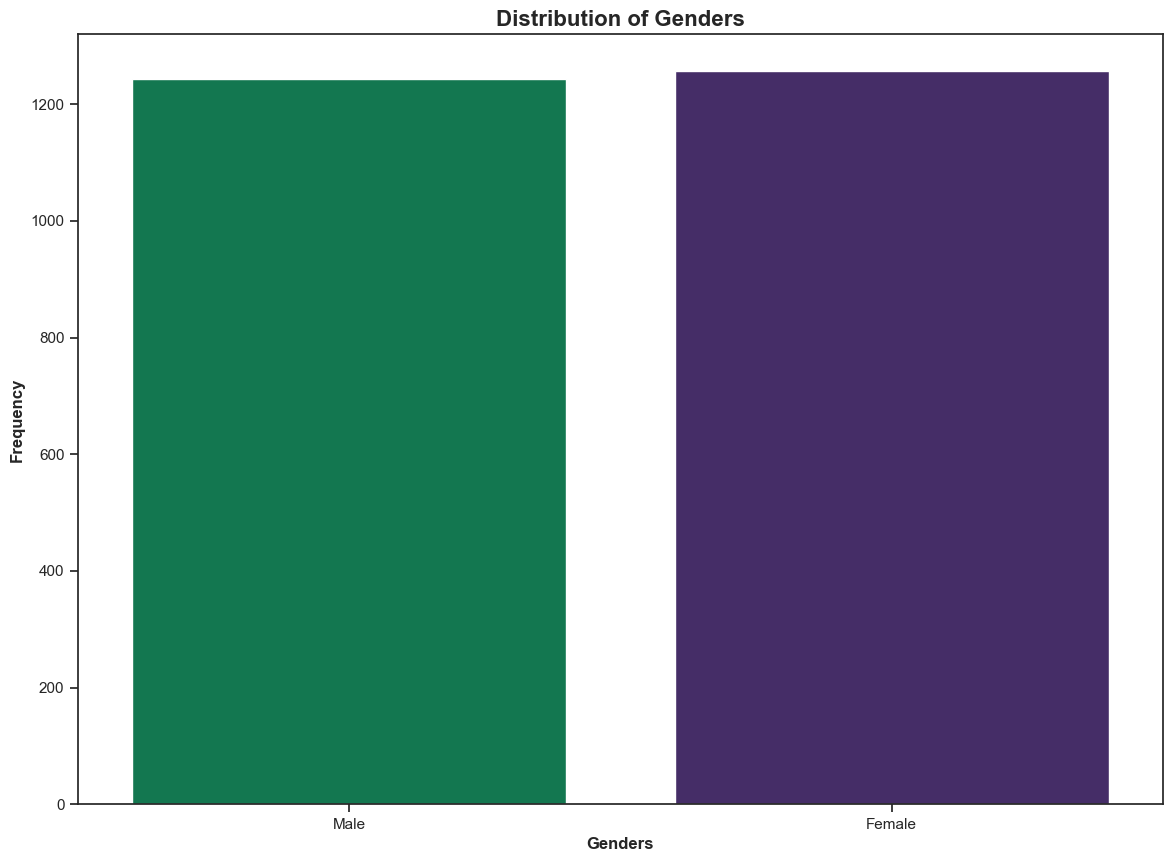

In [76]:
plt.figure(figsize=(14, 10))
title = "Distribution of Genders"
palette=['#038754','#432371']

sns.countplot(x='gender', data=df_netflix, palette=palette)
plt.title(title, fontsize=16, fontweight='bold')
plt.xlabel('Genders', fontsize=12, fontweight='bold')
plt.ylabel('Frequency', fontsize=12, fontweight='bold')
plt.show()


<span style="font-family:Cambria; color:#0261ab; font-size: 20px; text-shadow: 0.5px 0.5px black"> Age Groups </span>

In [77]:
df_netflix['age'].mean()


38.7956

In [78]:
df_netflix['age'].median()


39.0

In [79]:
df_netflix['age'].std()


7.171777631644703

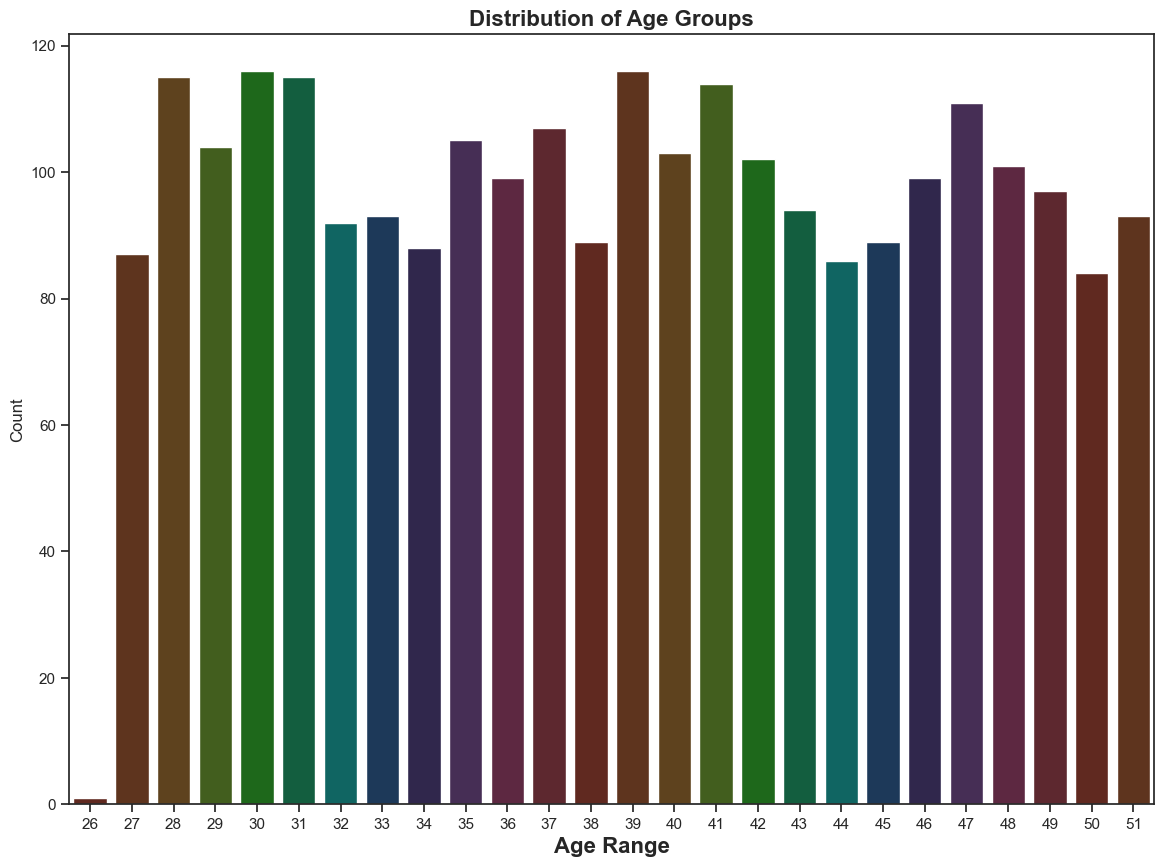

In [80]:
plt.figure(figsize=(14, 10))
title = "Distribution of Age Groups"
palette=['#6b2115','#693113', '#694313', '#436913', '#12750e', '#066b41', '#02736f', '#133863', '#2d2152', '#48275c', 
         '#661f40', '#661f29']

sns.countplot(x='age', data=df_netflix, palette=palette)
plt.title(title, fontsize=16, fontweight='bold')
plt.xlabel('Age Range', fontsize=16, fontweight='bold')
plt.ylabel('Count')
plt.show()


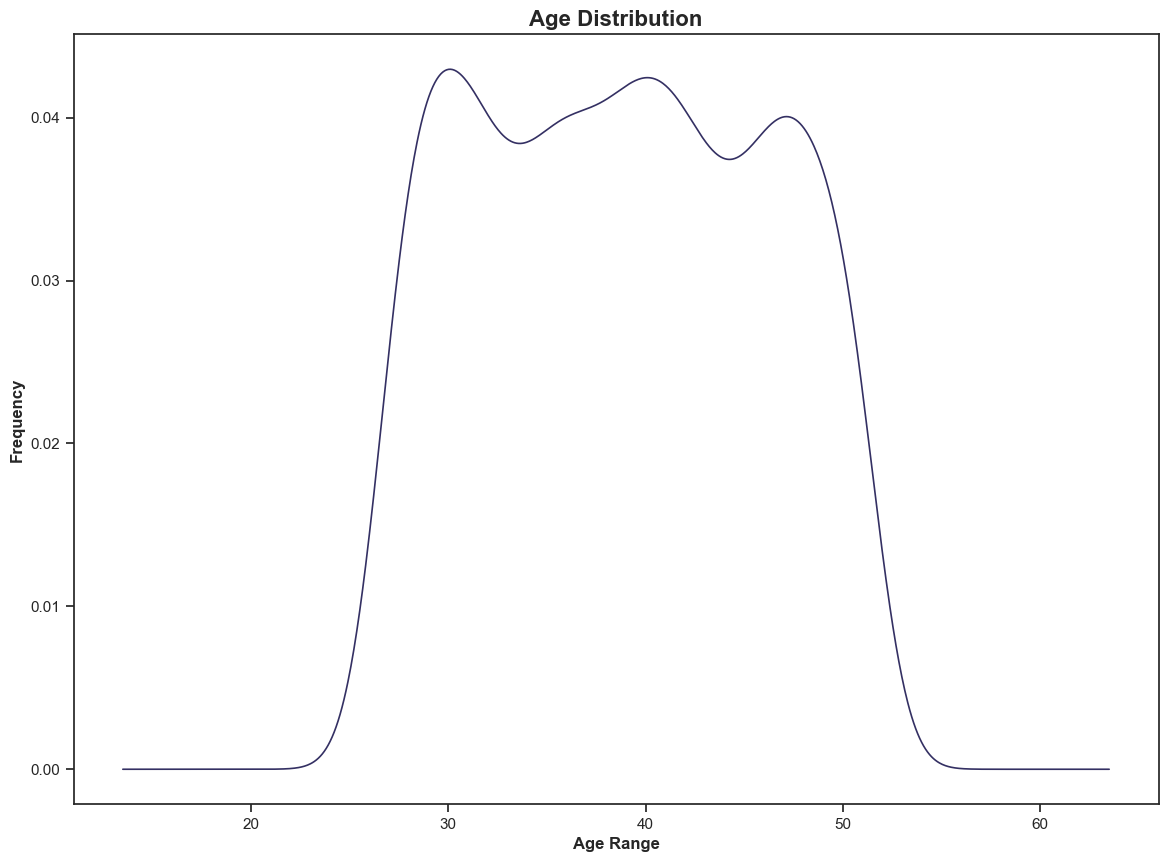

In [81]:
plt.figure(figsize=(14, 10))
df_netflix['age'].plot(kind='kde', color='#343063', linewidth=1.2)
plt.title("Age Distribution", fontsize=16, fontweight='bold')
plt.xlabel("Age Range", fontsize=12, fontweight='bold')
plt.ylabel("Frequency", fontsize=12, fontweight='bold')
plt.show()



<span style="font-family:Cambria; color:#0261ab; font-size: 20px; text-shadow: 0.5px 0.5px black"> Subscription Types </span>

In [82]:
df_netflix['subscription_type'].unique()


array(['Basic', 'Premium', 'Standard'], dtype=object)

In [83]:
df_netflix['subscription_type'].value_counts()


Basic       999
Standard    768
Premium     733
Name: subscription_type, dtype: int64

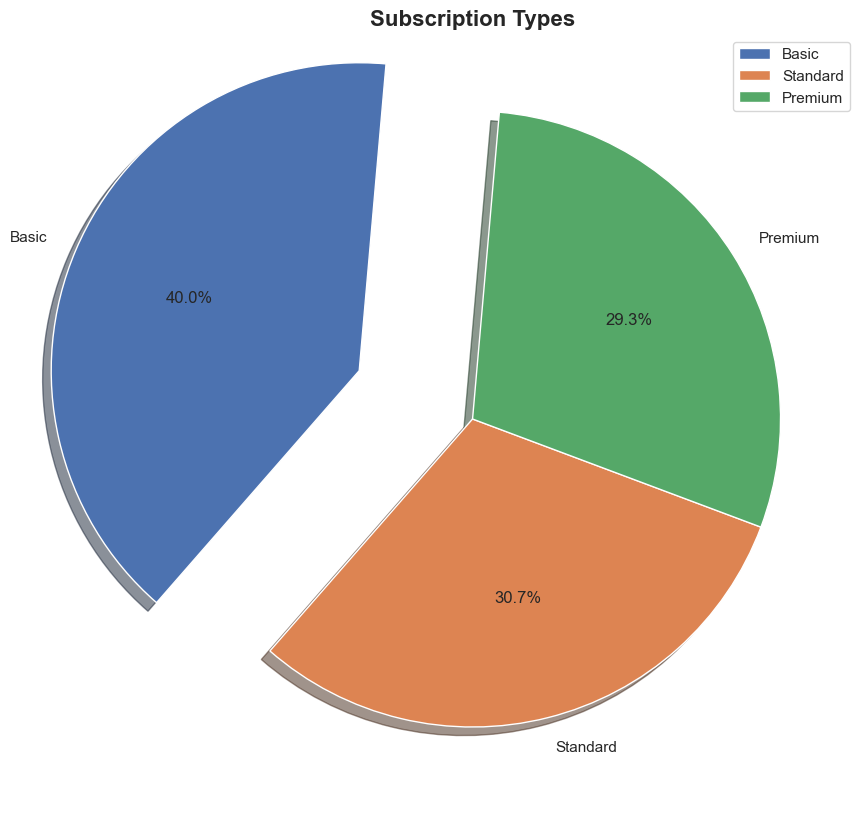

In [84]:
plt.figure(figsize=(14, 10))
explode = [0.4, 0.0, 0.0]
sub_count = df_netflix['subscription_type'].value_counts()
plt.pie(sub_count, labels=sub_count.index, autopct='%1.1f%%', shadow=True, explode=explode, startangle=85)
plt.title('Subscription Types', fontsize=16, fontweight='bold')
plt.legend(loc="upper right")
plt.show()


<span style="font-family:Cambria; color:#0261ab; font-size: 20px; text-shadow: 0.5px 0.5px black"> Monthly User Analysis </span>

In [85]:
customer_churn = df_netflix['clv'] > 30
customer_churn.value_counts()


True     2487
False      13
Name: clv, dtype: int64

In [86]:
customer_churn.get(False, 0)

0

In [87]:
df_netflix['start_month'].value_counts()


10    418
7     396
6     338
9     306
8     296
5     135
11    122
4     108
3     103
12     98
2      92
1      88
Name: start_month, dtype: int64

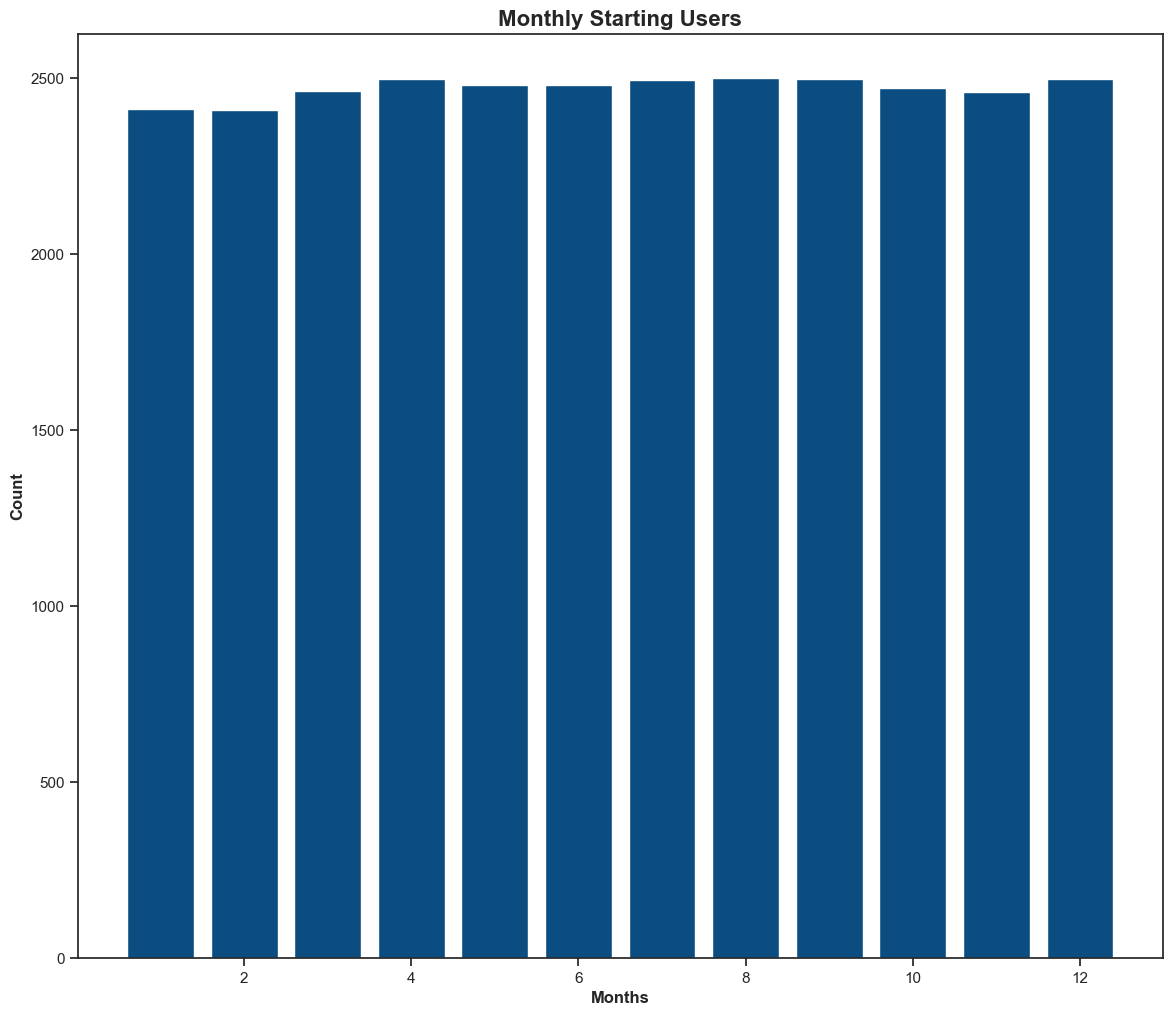

In [88]:
plt.figure(figsize=(14, 12))
plt.bar(df_netflix['start_month'], df_netflix['start_month'].index, color='#0b4d80')
plt.title('Monthly Starting Users', fontsize=16, fontweight='bold')
plt.xlabel('Months', fontsize=12, fontweight='bold')
plt.ylabel('Count', fontsize=12, fontweight='bold')
plt.show()


<span style="font-family:Cambria; color:#0261ab; font-size: 20px; text-shadow: 0.5px 0.5px black"> User Count in Countries </span>

In [89]:
query = df_netflix['country'].value_counts()
query


United States     451
Spain             451
Canada            317
United Kingdom    183
Australia         183
Germany           183
France            183
Brazil            183
Mexico            183
Italy             183
Name: country, dtype: int64

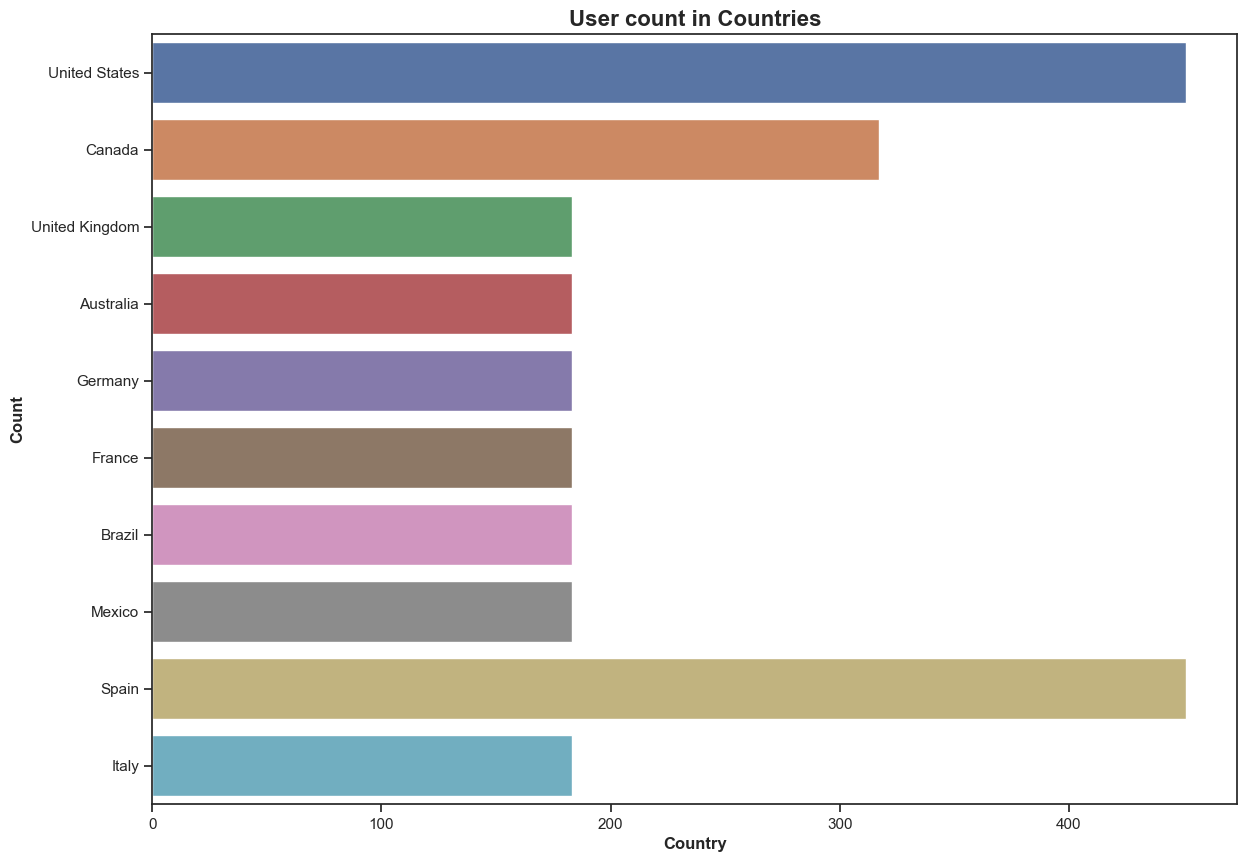

In [90]:
plt.figure(figsize=(14, 10))

sns.countplot(y=df_netflix['country'])
plt.title('User count in Countries', fontsize=16, fontweight='bold')
plt.xlabel('Country', fontsize=12, fontweight='bold')
plt.ylabel('Count', fontsize=12, fontweight='bold')
plt.show()


<span style="font-family:Cambria; color:#0261ab; font-size: 20px; text-shadow: 0.5px 0.5px black"> Age Density </span>

In [91]:
query = df_netflix.groupby('subscription_type')['age'].mean().sort_values()
query


subscription_type
Premium     38.512960
Basic       38.828829
Standard    39.022135
Name: age, dtype: float64

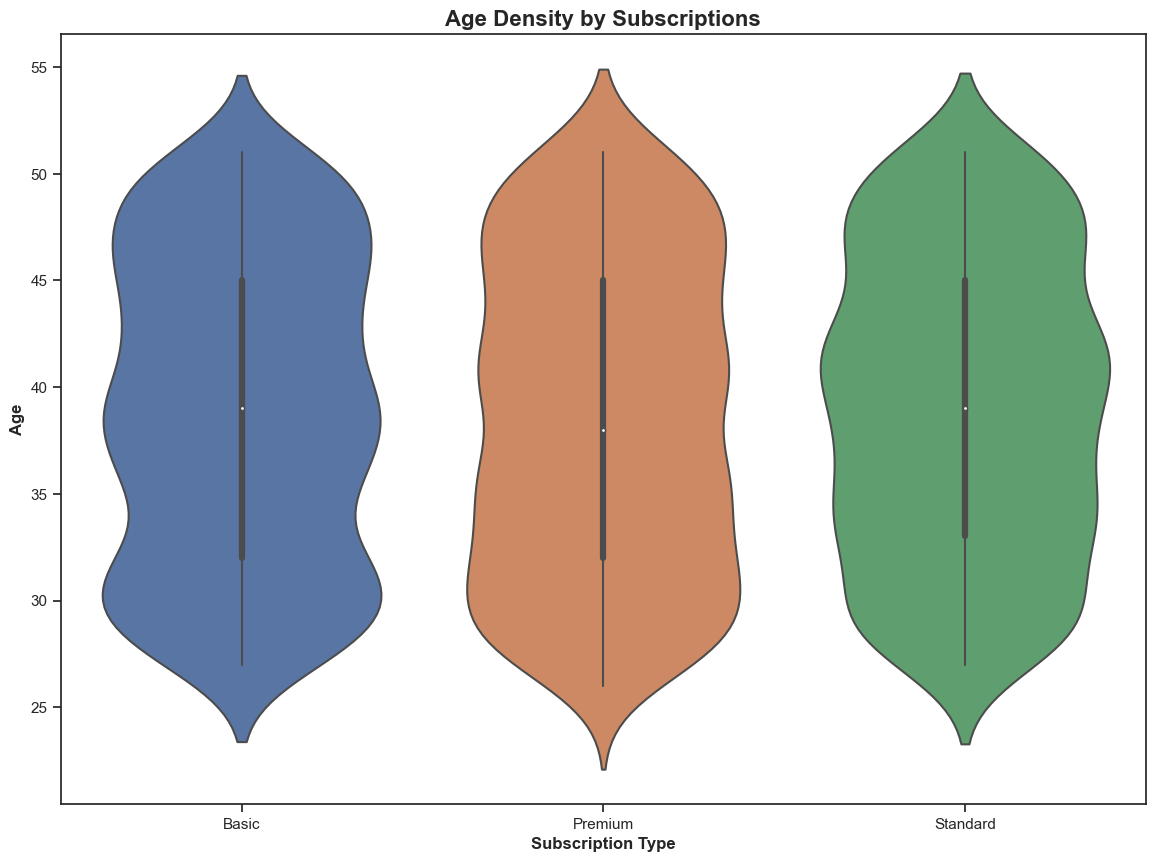

In [92]:
plt.figure(figsize=(14, 10))
sns.violinplot(x='subscription_type', y='age', data=df_netflix)
plt.title('Age Density by Subscriptions', fontsize=16, fontweight='bold')
plt.xlabel('Subscription Type', fontsize=12, fontweight='bold')
plt.ylabel('Age', fontsize=12, fontweight='bold')
plt.show()


<span style="font-family:Cambria; color:#0261ab; font-size: 24px; text-shadow: 0.5px 0.5px black"> 2.2 Feature Correlations</span>

<span style="font-family:Cambria; color:#0261ab; font-size: 20px; text-shadow: 0.5px 0.5px black"> Pearson Correlation Heatmap </span>

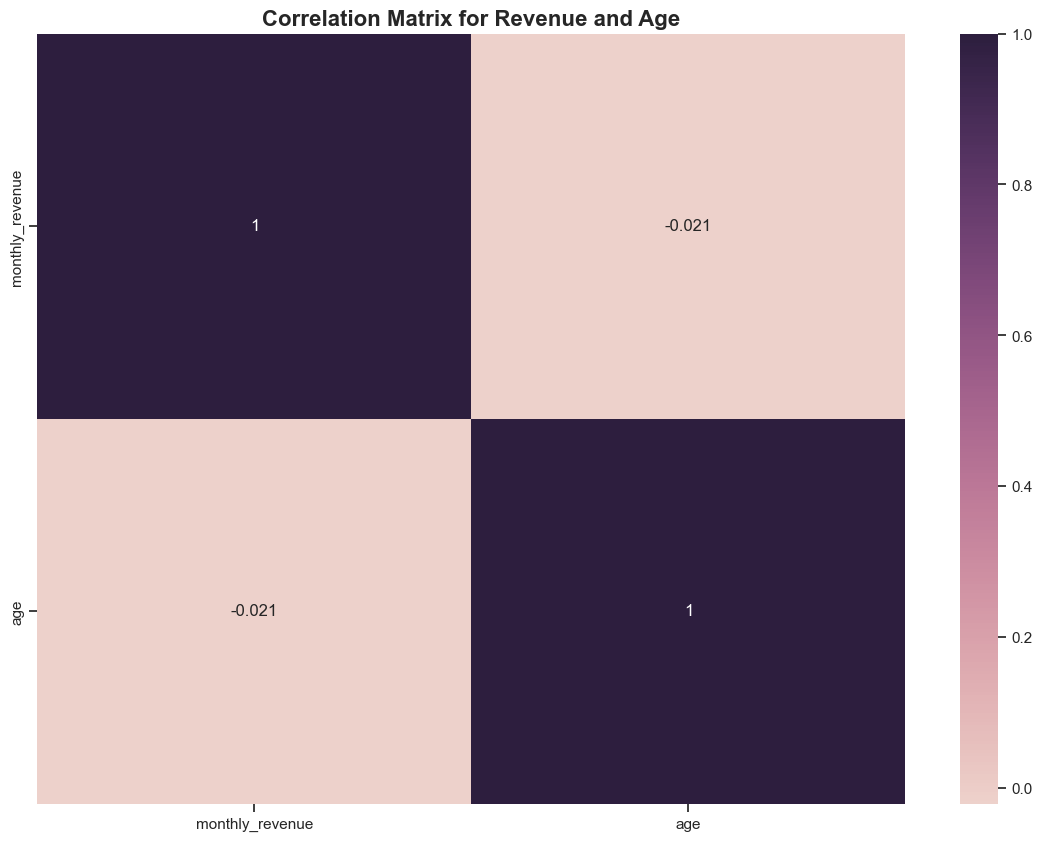

In [93]:
plt.figure(figsize=(14, 10))
title = "Correlation Matrix for Revenue and Age"
corr_matrix = df_netflix[['monthly_revenue', 'age']].corr()
sns.heatmap(corr_matrix, annot=True, cmap=sns.cubehelix_palette(as_cmap=True))
plt.title(title, fontsize=16, fontweight='bold')
plt.show()


<span style="font-family:Cambria; color:#0261ab; font-size: 20px; text-shadow: 0.5px 0.5px black"> Pair Plots </span>

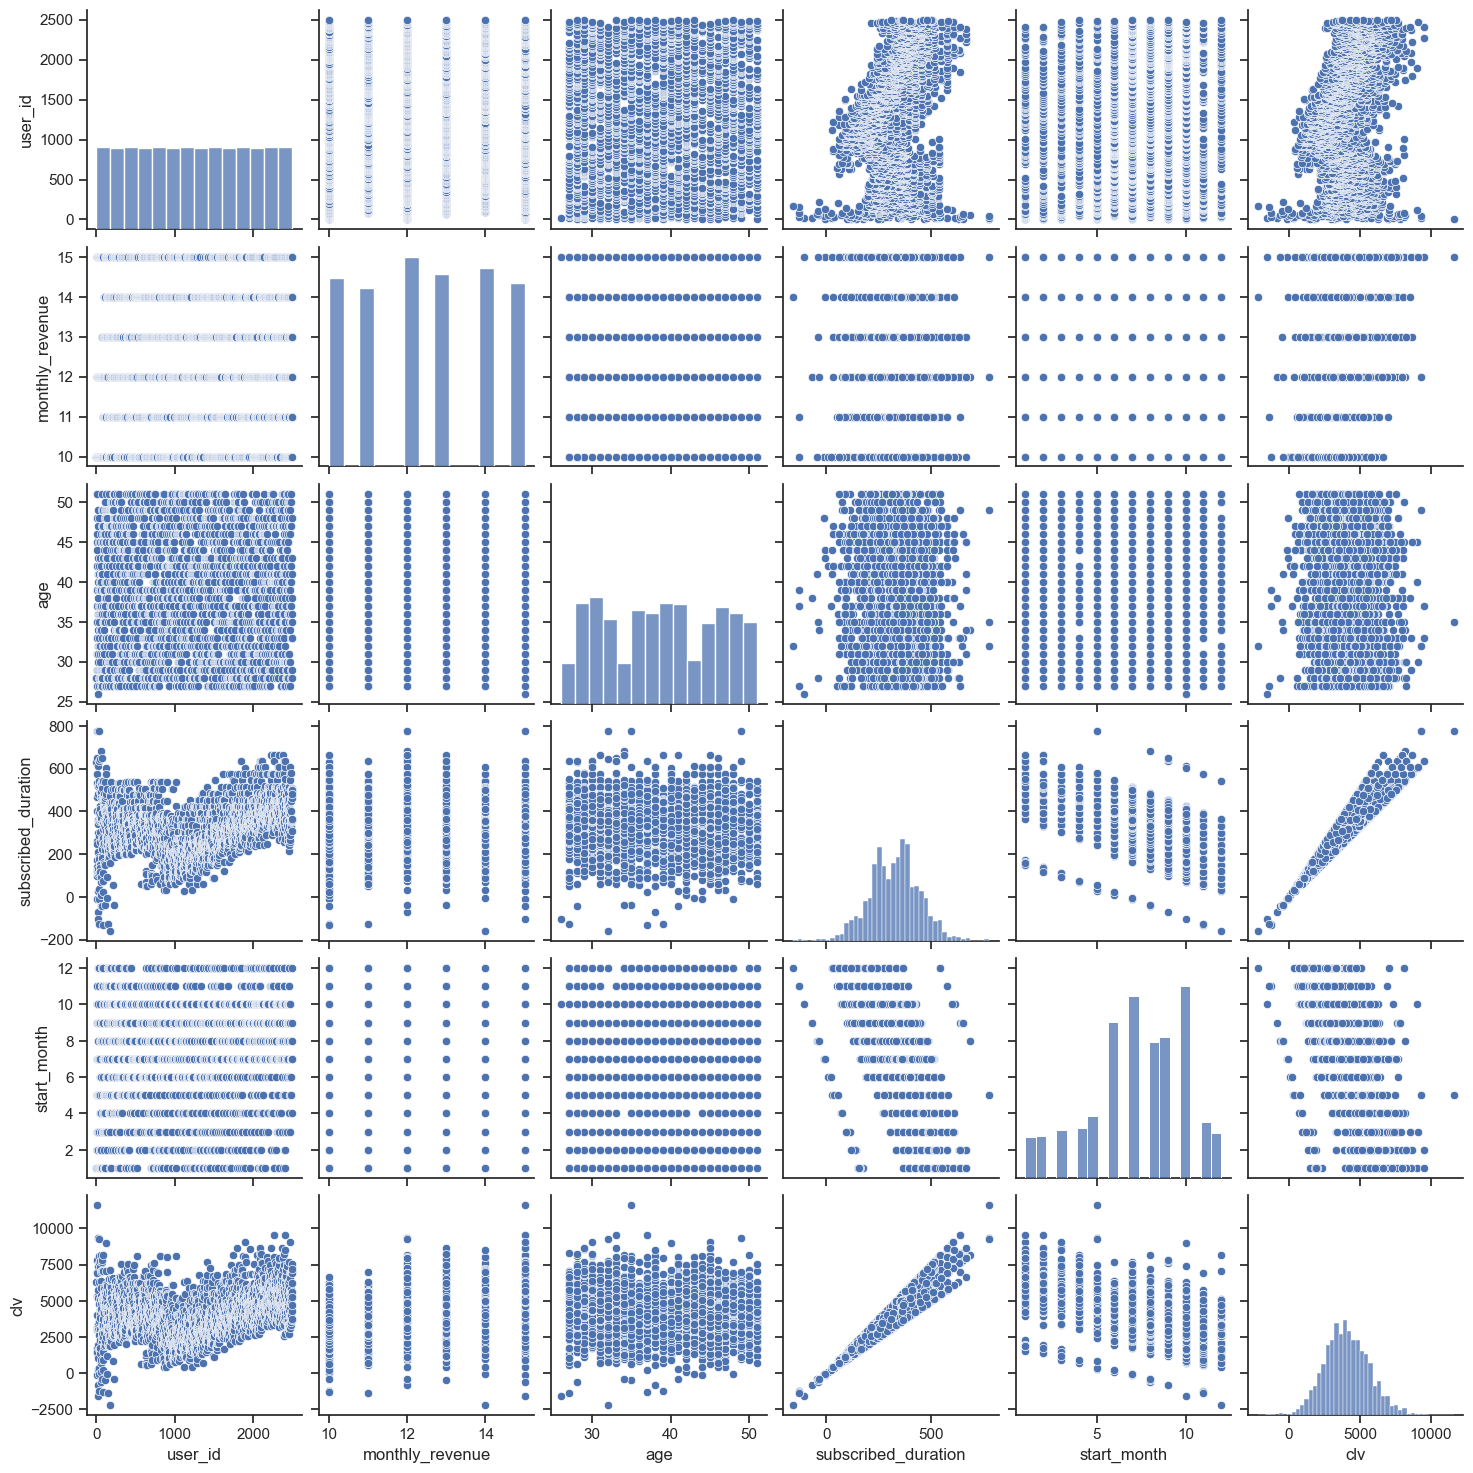

In [94]:
sns.set(style="ticks", color_codes=True)
sns.pairplot(df_netflix)
plt.show()


<span style="font-family:Cambria; color:#0261ab; font-size: 20px; text-shadow: 0.5px 0.5px black"> Monthly Revenue by Genders </span>

In [95]:
query = df_netflix.groupby('gender')['monthly_revenue'].mean().sort_values()
query


gender
Male      12.497989
Female    12.518695
Name: monthly_revenue, dtype: float64

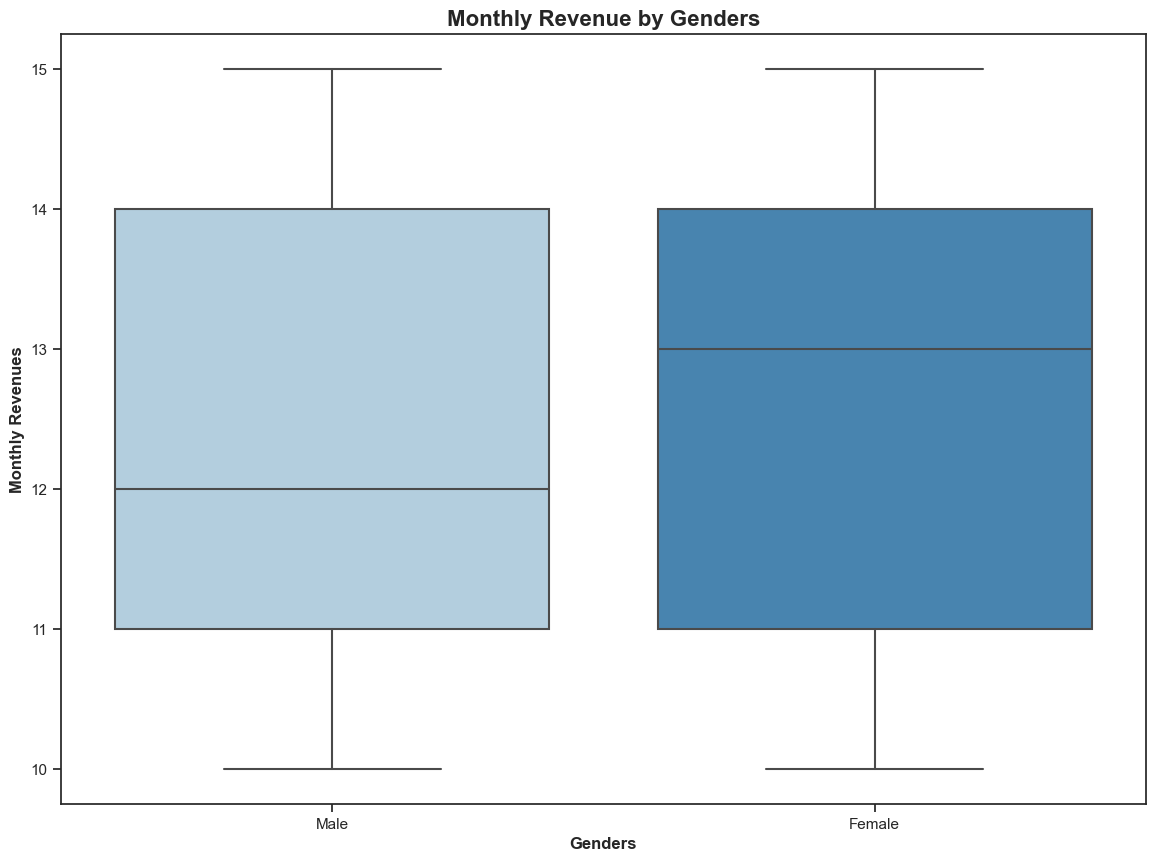

In [96]:
plt.figure(figsize=(14, 10))
sns.boxplot(x='gender', y='monthly_revenue', data=df_netflix, palette="Blues")
plt.title('Monthly Revenue by Genders', fontsize=16, fontweight='bold')
plt.xlabel('Genders', fontsize=12, fontweight='bold')
plt.ylabel('Monthly Revenues', fontsize=12, fontweight='bold')
plt.show()


<span style="font-family:Cambria; color:#0261ab; font-size: 20px; text-shadow: 0.5px 0.5px black"> Most used Devices </span>

In [97]:
query = df_netflix['device'].value_counts()
query


Laptop        636
Tablet        633
Smartphone    621
Smart TV      610
Name: device, dtype: int64

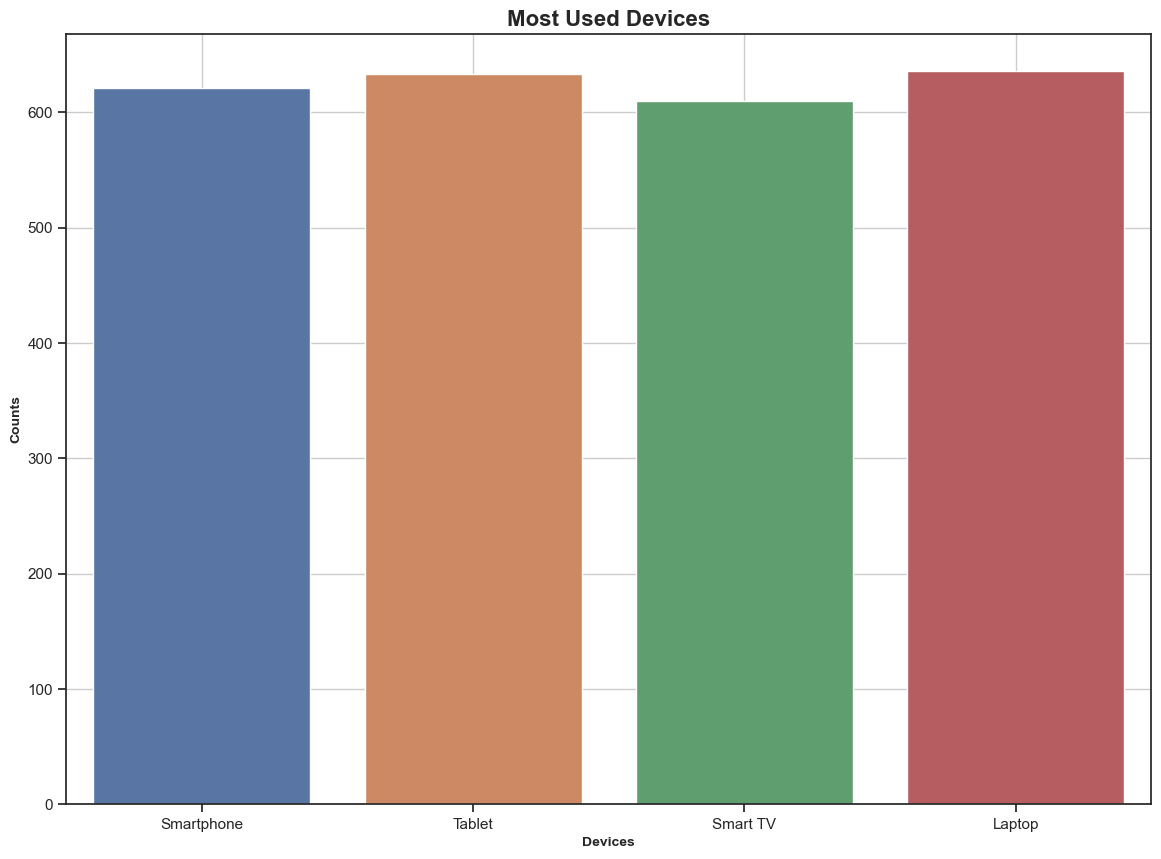

In [98]:
plt.figure(figsize=(14, 10))
sns.countplot(x=df_netflix['device'])
plt.title('Most Used Devices', fontsize=16, fontweight='bold')
plt.xlabel('Devices', fontsize=10, fontweight='bold')
plt.ylabel('Counts', fontsize=10, fontweight='bold')
plt.grid(True)
plt.show()


<span style="font-family:Cambria; color:#0261ab; font-size: 20px; text-shadow: 0.5px 0.5px black"> Monthly Revenue vs Subscription Types </span>

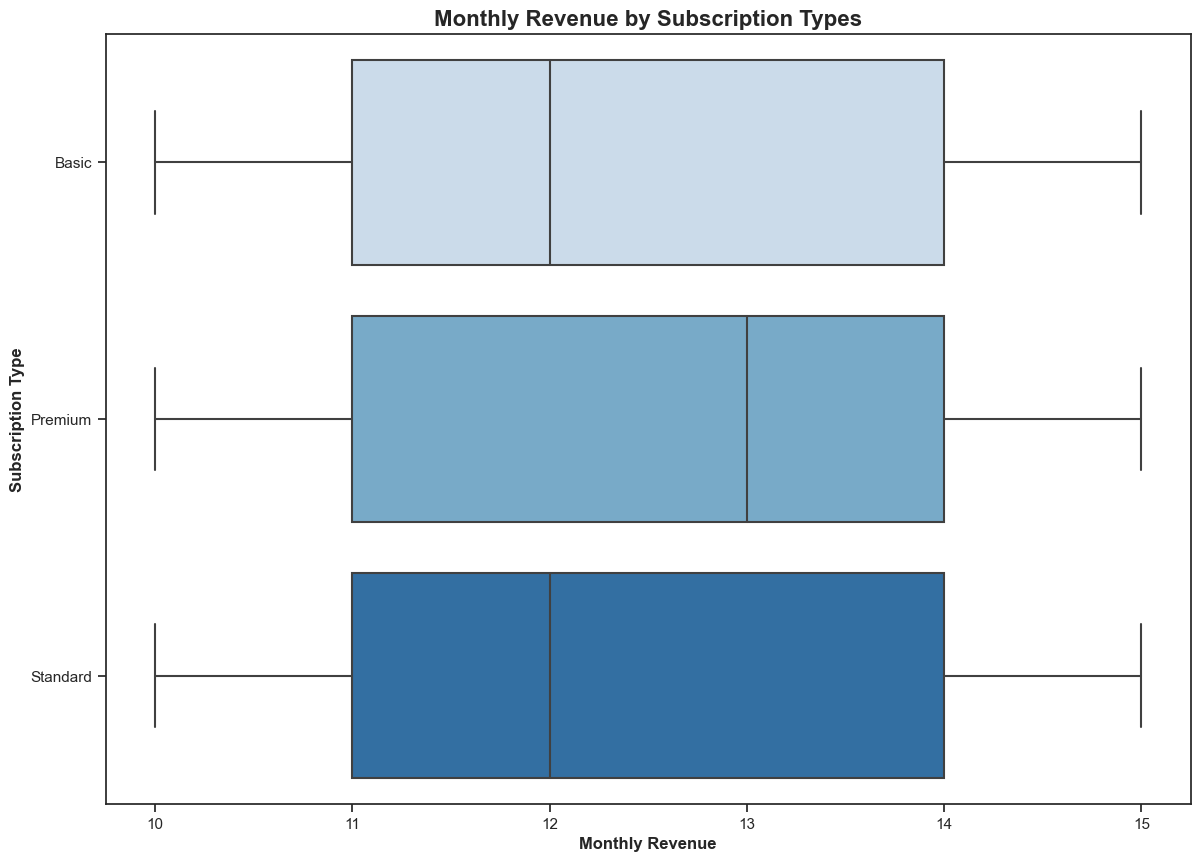

In [99]:
plt.figure(figsize=(14, 10))
sns.boxplot(x='monthly_revenue', y='subscription_type', data=df_netflix, palette="Blues")
plt.title('Monthly Revenue by Subscription Types', fontsize=16, fontweight='bold')
plt.xlabel('Monthly Revenue', fontsize=12, fontweight='bold')
plt.ylabel('Subscription Type', fontsize=12, fontweight='bold')
plt.show()


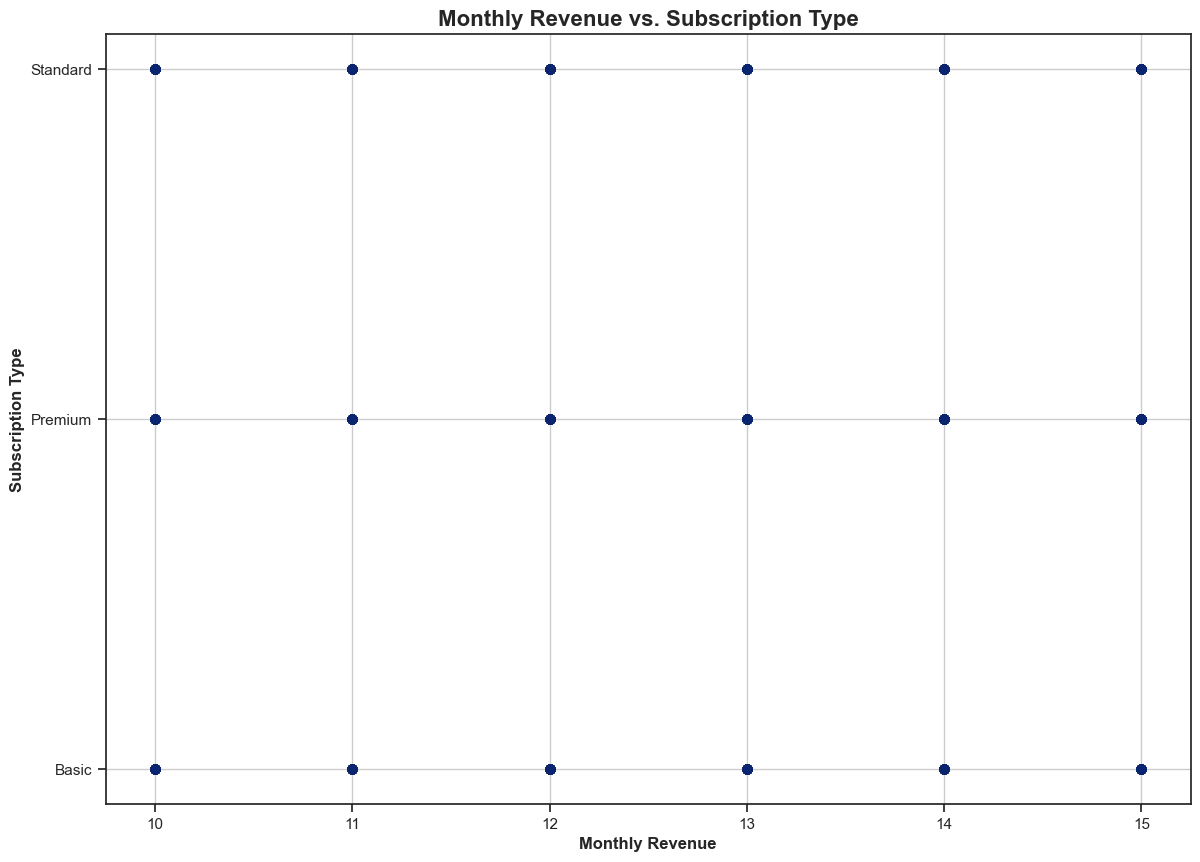

In [100]:
plt.figure(figsize=(14, 10))
plt.scatter(x='monthly_revenue', y='subscription_type', data=df_netflix, color='#0b2470', linewidth=1.2)
plt.title('Monthly Revenue vs. Subscription Type', fontsize=16, fontweight='bold')
plt.xlabel('Monthly Revenue', fontsize=12, fontweight='bold')
plt.ylabel('Subscription Type', fontsize=12, fontweight='bold')
plt.grid(True)
plt.show()


<span style="font-family:Cambria; color:#0261ab; font-size: 20px; text-shadow: 0.5px 0.5px black"> Subscription Type vs Plan Duration </span>

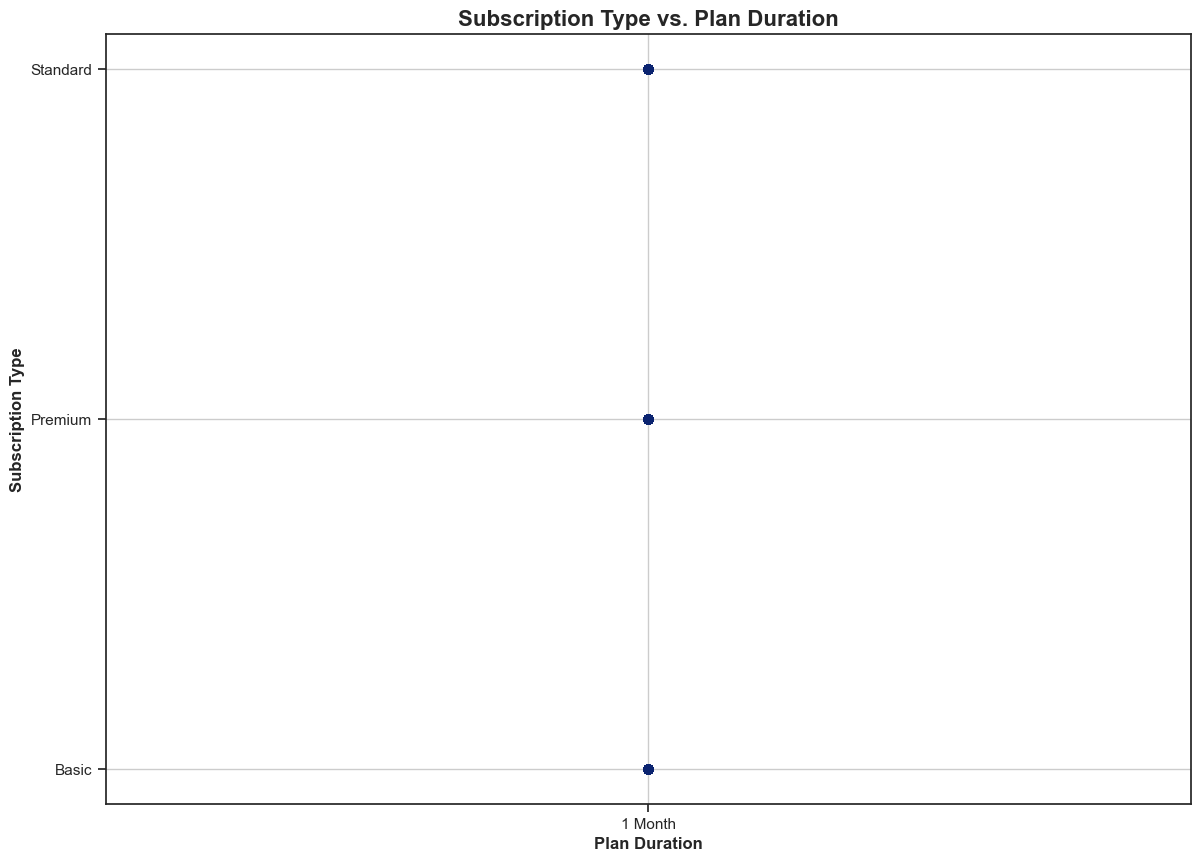

In [101]:
plt.figure(figsize=(14, 10))
plt.scatter(x='plan_duration', y='subscription_type', data=df_netflix, color='#0b2470', linewidth=1.2)
plt.title('Subscription Type vs. Plan Duration', fontsize=16, fontweight='bold')
plt.xlabel('Plan Duration', fontsize=12, fontweight='bold')
plt.ylabel('Subscription Type', fontsize=12, fontweight='bold')
plt.grid(True)
plt.show()


<span style="font-family:Cambria; color:#0261ab; font-size: 20px; text-shadow: 0.5px 0.5px black"> Plan Duration vs Monthly Revenues </span>

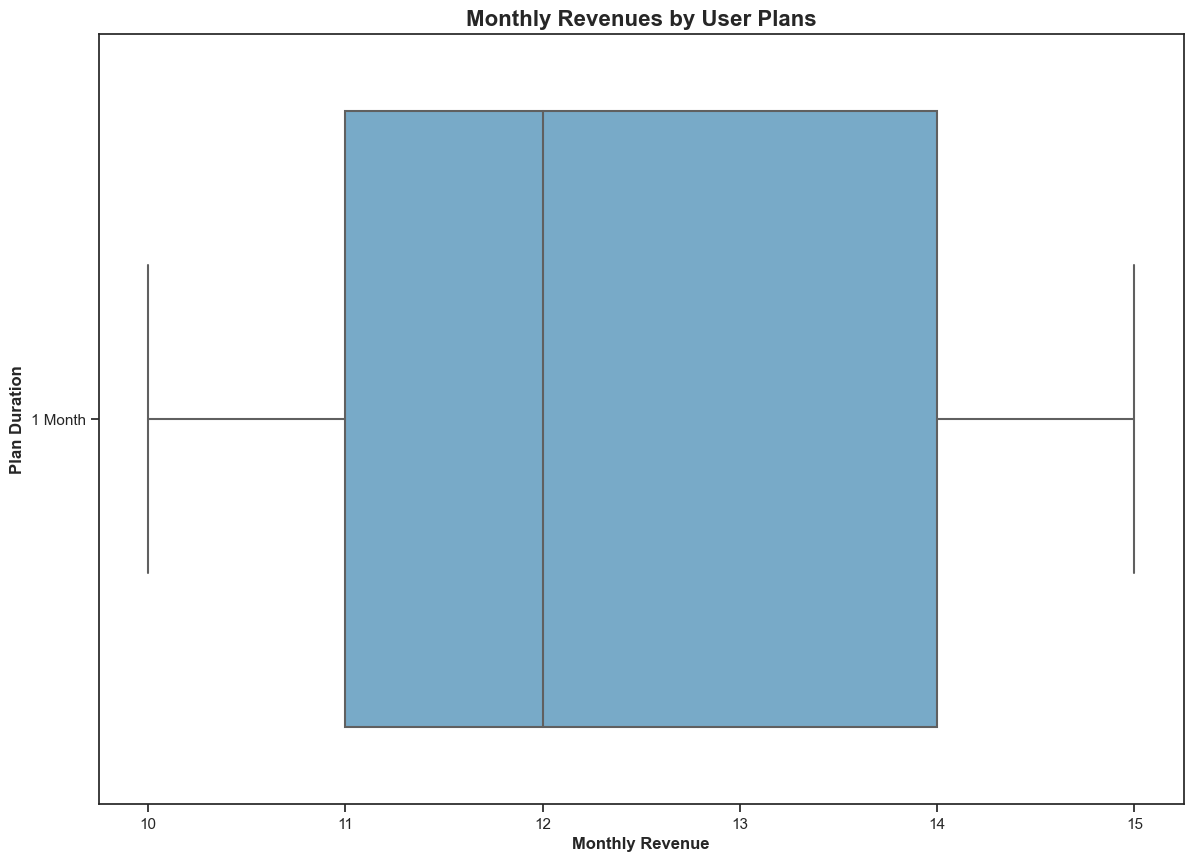

In [102]:
plt.figure(figsize=(14, 10))
sns.boxplot(x='monthly_revenue', y='plan_duration', data=df_netflix, palette="Blues")
plt.title('Monthly Revenues by User Plans', fontsize=16, fontweight='bold')
plt.xlabel('Monthly Revenue', fontsize=12, fontweight='bold')
plt.ylabel('Plan Duration', fontsize=12, fontweight='bold')
plt.show()


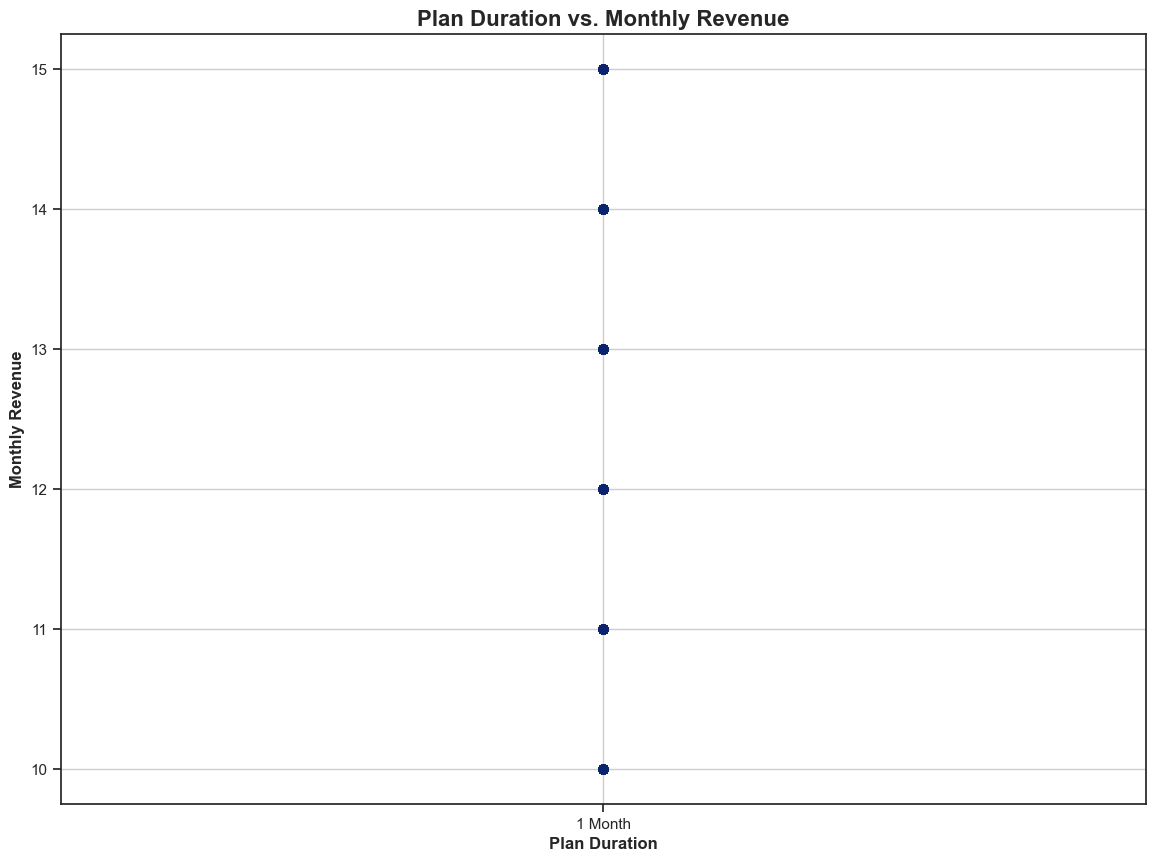

In [103]:
plt.figure(figsize=(14, 10))
plt.scatter(x='plan_duration', y='monthly_revenue', data=df_netflix, color='#0b2470', linewidth=1.2)
plt.title('Plan Duration vs. Monthly Revenue', fontsize=16, fontweight='bold')
plt.xlabel('Plan Duration', fontsize=12, fontweight='bold')
plt.ylabel('Monthly Revenue', fontsize=12, fontweight='bold')
plt.grid(True)
plt.show()
